In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
import matplotlib.patches as mpatches
import time
import matplotlib.patches as mpatches
import pickle
import os
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import collections

C:\Users\ezhil\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [ ]:
#pip install imbalanced-learn

In [ ]:
#pip install --upgrade scikit-learn

In [ ]:
#pip install imbalanced-learn==0.8.1

In [ ]:
#pip install -U imbalanced-learn

In [ ]:
#pip install xgboost

In [2]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline as imbalanced_Pipeline
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, confusion_matrix, roc_curve
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso, SGDRegressor, Ridge
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from plotly.subplots import make_subplots
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.inspection import permutation_importance
from imblearn.under_sampling import RandomUnderSampler
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import KNNImputer
from scipy.stats import yeojohnson
from sklearn.preprocessing import PowerTransformer
from scipy import stats
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mutual_info_score
%matplotlib inline

In [3]:
Data = pd.read_csv('Mercedes_Benz.csv')
Benz = pd.DataFrame(Data)
print(Benz)

        ID       y  X0 X1  X2 X3 X4  X5 X6 X8  ...  X375  X376  X377  X378  \
0        0  130.81   k  v  at  a  d   u  j  o  ...     0     0     1     0   
1        6   88.53   k  t  av  e  d   y  l  o  ...     1     0     0     0   
2        7   76.26  az  w   n  c  d   x  j  x  ...     0     0     0     0   
3        9   80.62  az  t   n  f  d   x  l  e  ...     0     0     0     0   
4       13   78.02  az  v   n  f  d   h  d  n  ...     0     0     0     0   
...    ...     ...  .. ..  .. .. ..  .. .. ..  ...   ...   ...   ...   ...   
4204  8405  107.39  ak  s  as  c  d  aa  d  q  ...     1     0     0     0   
4205  8406  108.77   j  o   t  d  d  aa  h  h  ...     0     1     0     0   
4206  8412  109.22  ak  v   r  a  d  aa  g  e  ...     0     0     1     0   
4207  8415   87.48  al  r   e  f  d  aa  l  u  ...     0     0     0     0   
4208  8417  110.85   z  r  ae  c  d  aa  g  w  ...     1     0     0     0   

      X379  X380  X382  X383  X384  X385  
0        0     0    

## Exploratory Data Analysis

In [4]:
print(Benz.dtypes)

ID        int64
y       float64
X0       object
X1       object
X2       object
         ...   
X380      int64
X382      int64
X383      int64
X384      int64
X385      int64
Length: 378, dtype: object


In [5]:
Benz.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
Benz = Benz.drop('ID', axis=1)
print(Benz)

           y  X0 X1  X2 X3 X4  X5 X6 X8  X10  ...  X375  X376  X377  X378  \
0     130.81   k  v  at  a  d   u  j  o    0  ...     0     0     1     0   
1      88.53   k  t  av  e  d   y  l  o    0  ...     1     0     0     0   
2      76.26  az  w   n  c  d   x  j  x    0  ...     0     0     0     0   
3      80.62  az  t   n  f  d   x  l  e    0  ...     0     0     0     0   
4      78.02  az  v   n  f  d   h  d  n    0  ...     0     0     0     0   
...      ...  .. ..  .. .. ..  .. .. ..  ...  ...   ...   ...   ...   ...   
4204  107.39  ak  s  as  c  d  aa  d  q    0  ...     1     0     0     0   
4205  108.77   j  o   t  d  d  aa  h  h    0  ...     0     1     0     0   
4206  109.22  ak  v   r  a  d  aa  g  e    0  ...     0     0     1     0   
4207   87.48  al  r   e  f  d  aa  l  u    0  ...     0     0     0     0   
4208  110.85   z  r  ae  c  d  aa  g  w    0  ...     1     0     0     0   

      X379  X380  X382  X383  X384  X385  
0        0     0     0     0    

In [7]:
Benz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, y to X385
dtypes: float64(1), int64(368), object(8)
memory usage: 12.1+ MB


In [8]:
Benz.isnull().sum()

y       0
X0      0
X1      0
X2      0
X3      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 377, dtype: int64

In [9]:
numeric_columns = Benz.select_dtypes(include=['float64', 'int64'])
for i in numeric_columns:
    lower = numeric_columns[i].quantile(0.10)
    upper = numeric_columns[i].quantile(0.90)
    print('Feature: ', i)
    print('Skewness value: ', numeric_columns[i].skew())
    print('\n')

Feature:  y
Skewness value:  1.206525852242492


Feature:  X10
Skewness value:  8.498568931886606


Feature:  X11
Skewness value:  0


Feature:  X12
Skewness value:  3.2261756829392527


Feature:  X13
Skewness value:  3.7844082228324707


Feature:  X14
Skewness value:  0.29059942632845925


Feature:  X15
Skewness value:  45.858470177447444


Feature:  X16
Skewness value:  19.4912735944891


Feature:  X17
Skewness value:  11.341542499404174


Feature:  X18
Skewness value:  11.164326651053292


Feature:  X19
Skewness value:  2.6760051967229503


Feature:  X20
Skewness value:  2.042761876277686


Feature:  X21
Skewness value:  19.4912735944891


Feature:  X22
Skewness value:  2.9328089448336505


Feature:  X23
Skewness value:  6.7403854967700045


Feature:  X24
Skewness value:  22.880122459535304


Feature:  X26
Skewness value:  14.05611601426486


Feature:  X27
Skewness value:  -0.7847975559287724


Feature:  X28
Skewness value:  5.2703005791878015


Feature:  X29
Skewness value:  4.5070

Feature:  X197
Skewness value:  5.29167998128085


Feature:  X198
Skewness value:  6.3595728399412375


Feature:  X199
Skewness value:  18.654781694743914


Feature:  X200
Skewness value:  12.142207437644657


Feature:  X201
Skewness value:  1.6867589049370286


Feature:  X202
Skewness value:  1.2091131159205195


Feature:  X203
Skewness value:  7.505931061643713


Feature:  X204
Skewness value:  64.87680633323431


Feature:  X205
Skewness value:  -64.87680633323431


Feature:  X206
Skewness value:  7.001251312178456


Feature:  X207
Skewness value:  64.87680633323437


Feature:  X208
Skewness value:  3.5999230212737734


Feature:  X209
Skewness value:  -2.641025783867673


Feature:  X210
Skewness value:  64.87680633323437


Feature:  X211
Skewness value:  7.991885861334637


Feature:  X212
Skewness value:  13.42139621142091


Feature:  X213
Skewness value:  22.88012245953531


Feature:  X214
Skewness value:  11.92670314910146


Feature:  X215
Skewness value:  2.6938306911027015


Feat

Skewness value:  0.7978024477814548


Feature:  X378
Skewness value:  6.7403854967700045


Feature:  X379
Skewness value:  10.114717464407876


Feature:  X380
Skewness value:  10.994926955969705


Feature:  X382
Skewness value:  11.341542499404174


Feature:  X383
Skewness value:  24.468634715355613


Feature:  X384
Skewness value:  45.858470177447444


Feature:  X385
Skewness value:  26.438600679858165




In [10]:
numeric_columns = Benz.select_dtypes(include=['float64', 'int64'])

# Calculate skewness for each numeric column
skewness_values = []
for col in numeric_columns:
    skewness = numeric_columns[col].skew()
    skewness_values.append((col, skewness))

# Sort skewness values in descending order
sorted_skewness = sorted(skewness_values, key=lambda x: abs(x[1]), reverse=True)

# Extract top 5 most skewed columns
top_5_skewed_columns = sorted_skewness[:5]

# Print top 5 most skewed columns and their skewness values
for col, skewness in top_5_skewed_columns:
    print(f"Feature: {col}, Skewness: {skewness}")

Feature: X207, Skewness: 64.87680633323437
Feature: X210, Skewness: 64.87680633323437
Feature: X257, Skewness: 64.87680633323437
Feature: X339, Skewness: 64.87680633323437
Feature: X33, Skewness: 64.87680633323436


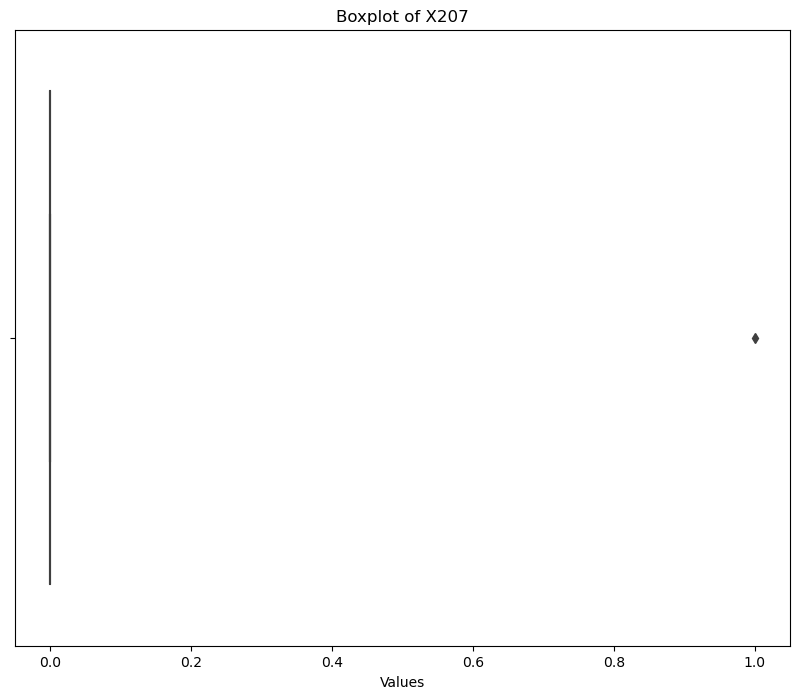

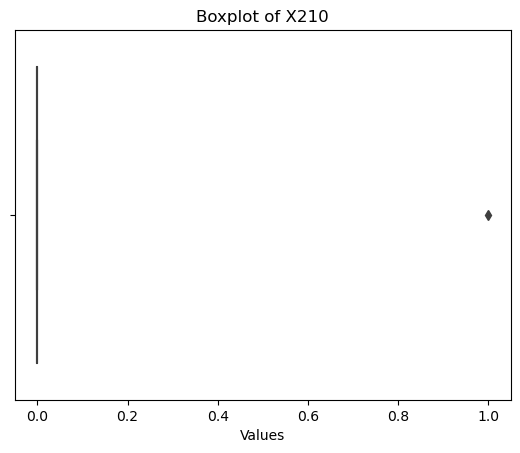

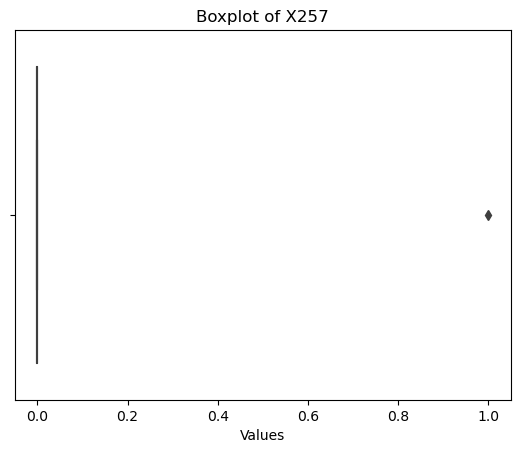

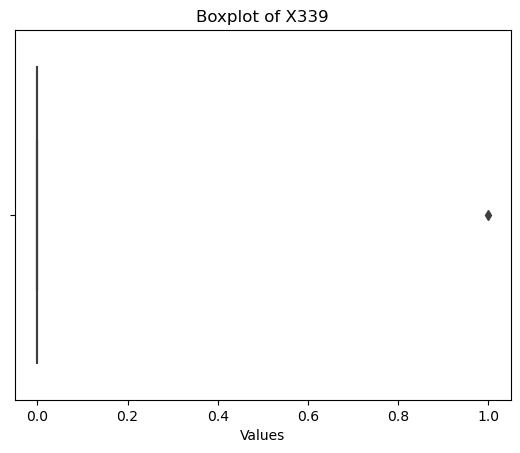

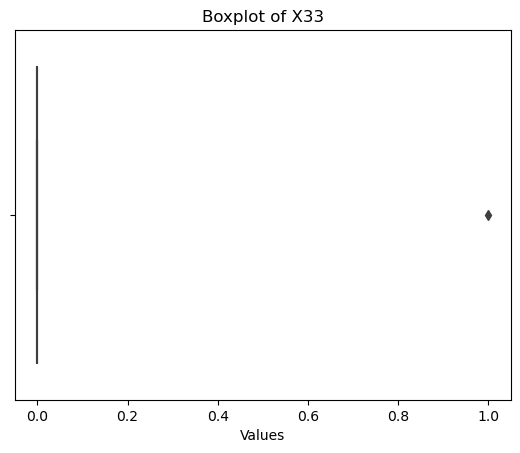

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract top 5 most skewed columns
top_5_columns = [col for col, _ in top_5_skewed_columns]

# Create box plots for the top 5 most skewed columns
plt.figure(figsize=(10, 8))
for col in top_5_columns:
    sns.boxplot(x=Benz[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel('Values')
    plt.show()

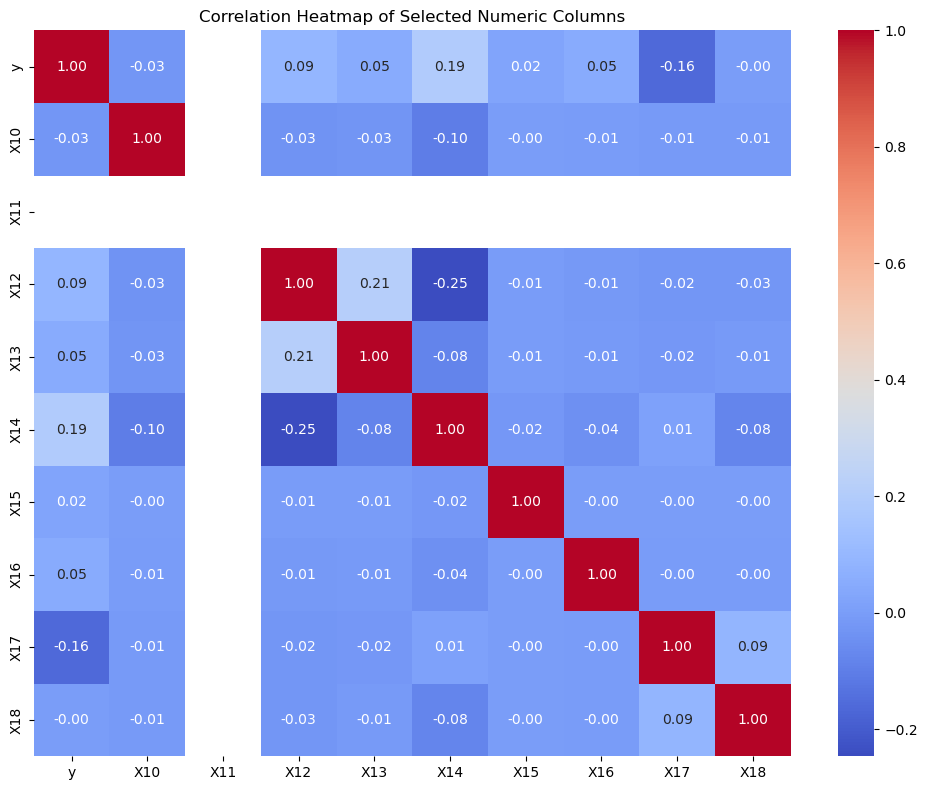

In [12]:
import seaborn as sns

numeric_columns = Benz.select_dtypes(include='number').columns.tolist()

# Sample a subset of columns (e.g., first 10 columns) for readability
selected_columns = numeric_columns[:10]  

# Calculate the correlation matrix
correlation_matrix = Benz[selected_columns].corr()

# Plotting heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Selected Numeric Columns')
plt.tight_layout()
plt.show()

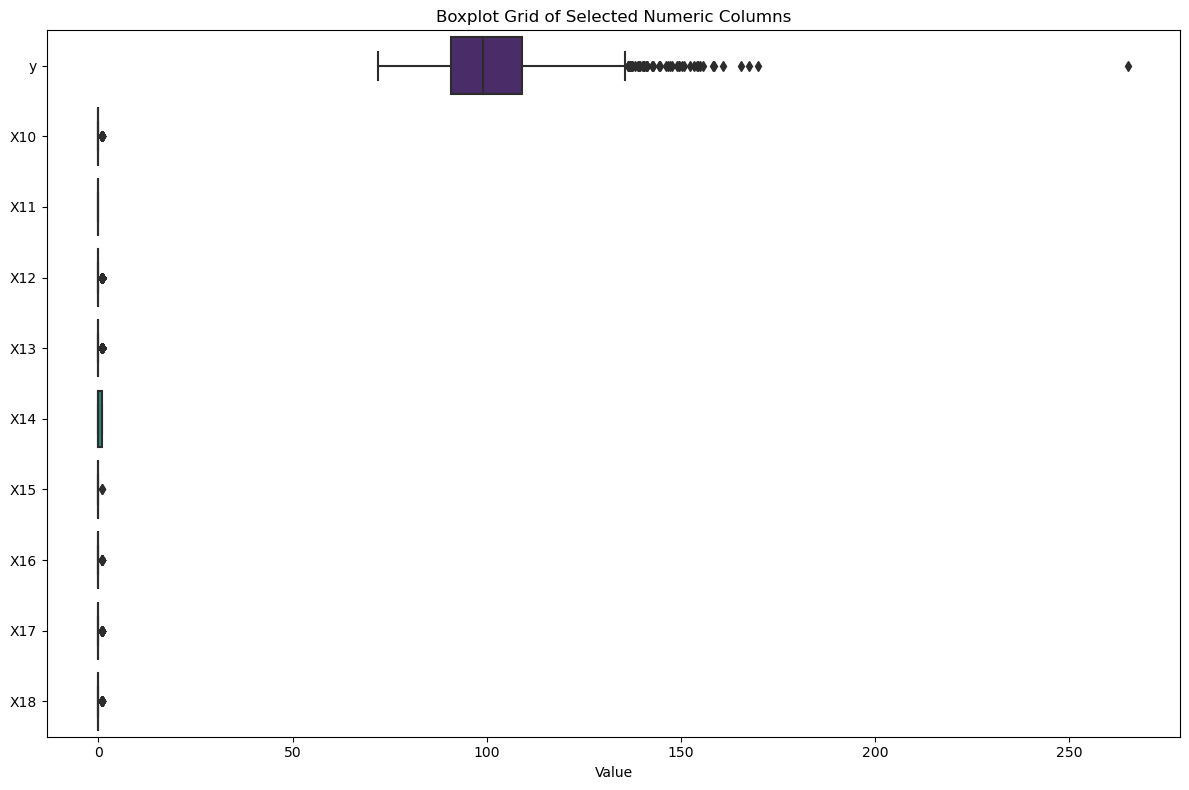

In [13]:
# Plotting boxplot grid for selected columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=Benz[selected_columns], orient='h', palette='viridis')
plt.xlabel('Value')
plt.title('Boxplot Grid of Selected Numeric Columns')
plt.tight_layout()
plt.show()

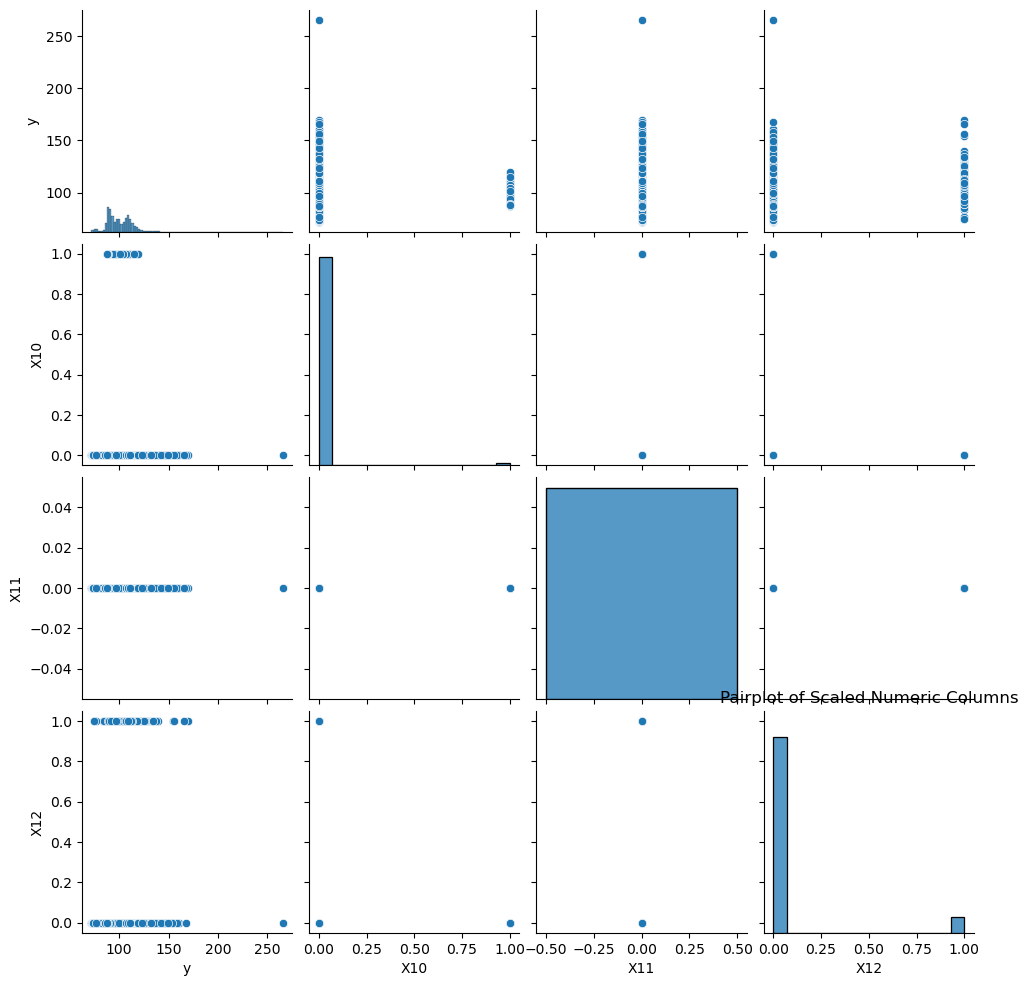

In [14]:
import seaborn as sns

subset_cols = numeric_columns[:4]  

# Create a pairplot
sns.pairplot(Benz[subset_cols])
plt.title('Pairplot of Scaled Numeric Columns')
plt.show()

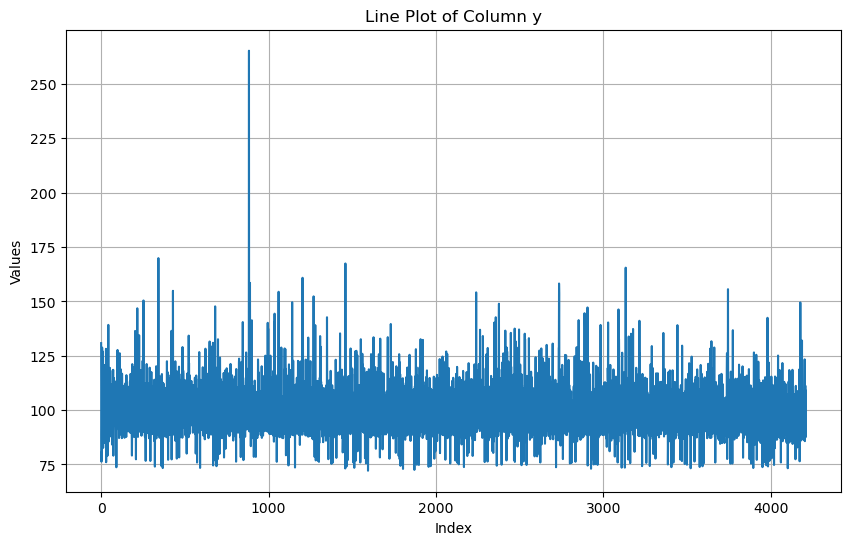

In [15]:
Benz['y'].plot.line(figsize=(10, 6))  # Line plot for the 'y' column
plt.xlabel('Index')  # Set X-axis label if needed
plt.ylabel('Values')  # Set Y-axis label if needed
plt.title('Line Plot of Column y')  # Set the plot title
plt.grid(True)  # Enable grid if required
plt.show()

In [16]:
# Summary statistics of the target variable
print(Benz['y'].describe())

# Check for missing values
missing_values = Benz.isnull().sum()
print("Missing values:\n", missing_values)

# Check unique values and data types of variables
unique_values = Benz.nunique()
data_types = Benz.dtypes
print("Unique values:\n", unique_values)
print("Data types:\n", data_types)

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64
Missing values:
 y       0
X0      0
X1      0
X2      0
X3      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 377, dtype: int64
Unique values:
 y       2545
X0        47
X1        27
X2        44
X3         7
        ... 
X380       2
X382       2
X383       2
X384       2
X385       2
Length: 377, dtype: int64
Data types:
 y       float64
X0       object
X1       object
X2       object
X3       object
         ...   
X380      int64
X382      int64
X383      int64
X384      int64
X385      int64
Length: 377, dtype: object


In [17]:
Benz.isnull().any()

y       False
X0      False
X1      False
X2      False
X3      False
        ...  
X380    False
X382    False
X383    False
X384    False
X385    False
Length: 377, dtype: bool

## Data Preprocessing

In [18]:
# Scale numeric features
numeric_cols = Benz.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaler = RobustScaler()
Benz[numeric_cols] = scaler.fit_transform(Benz[numeric_cols])
print(Benz)

             y  X0 X1  X2 X3 X4  X5 X6 X8  X10  ...  X375  X376  X377  X378  \
0     1.740517   k  v  at  a  d   u  j  o  0.0  ...   0.0   0.0   1.0   0.0   
1    -0.583837   k  t  av  e  d   y  l  o  0.0  ...   1.0   0.0   0.0   0.0   
2    -1.258384  az  w   n  c  d   x  j  x  0.0  ...   0.0   0.0   0.0   0.0   
3    -1.018692  az  t   n  f  d   x  l  e  0.0  ...   0.0   0.0   0.0   0.0   
4    -1.161627  az  v   n  f  d   h  d  n  0.0  ...   0.0   0.0   0.0   0.0   
...        ...  .. ..  .. .. ..  .. .. ..  ...  ...   ...   ...   ...   ...   
4204  0.452996  ak  s  as  c  d  aa  d  q  0.0  ...   1.0   0.0   0.0   0.0   
4205  0.528862   j  o   t  d  d  aa  h  h  0.0  ...   0.0   1.0   0.0   0.0   
4206  0.553601  ak  v   r  a  d  aa  g  e  0.0  ...   0.0   0.0   1.0   0.0   
4207 -0.641561  al  r   e  f  d  aa  l  u  0.0  ...   0.0   0.0   0.0   0.0   
4208  0.643211   z  r  ae  c  d  aa  g  w  0.0  ...   1.0   0.0   0.0   0.0   

      X379  X380  X382  X383  X384  X385  
0      0

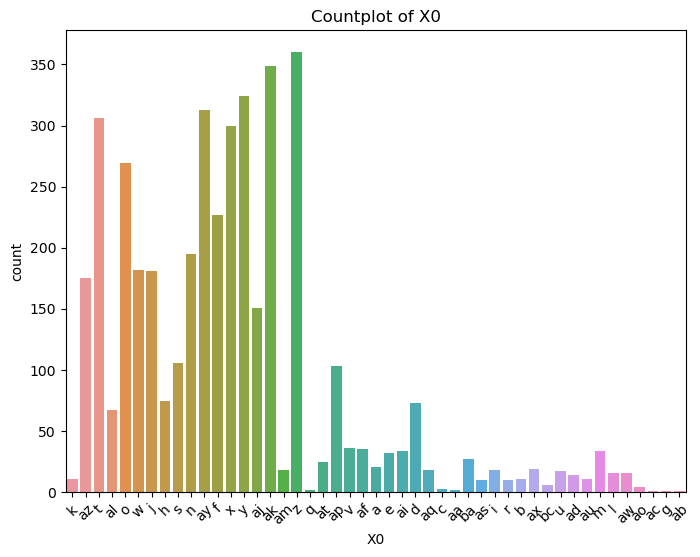

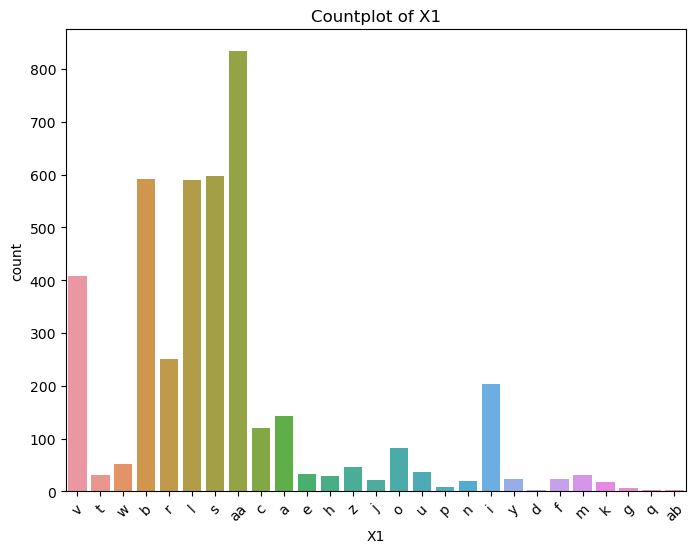

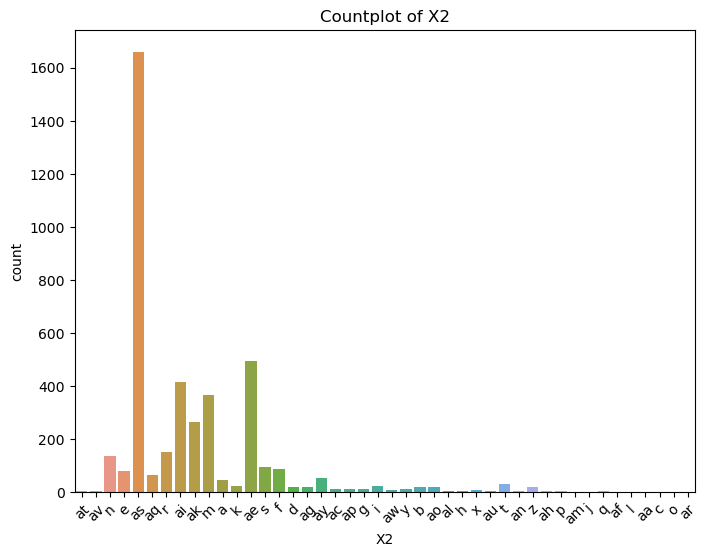

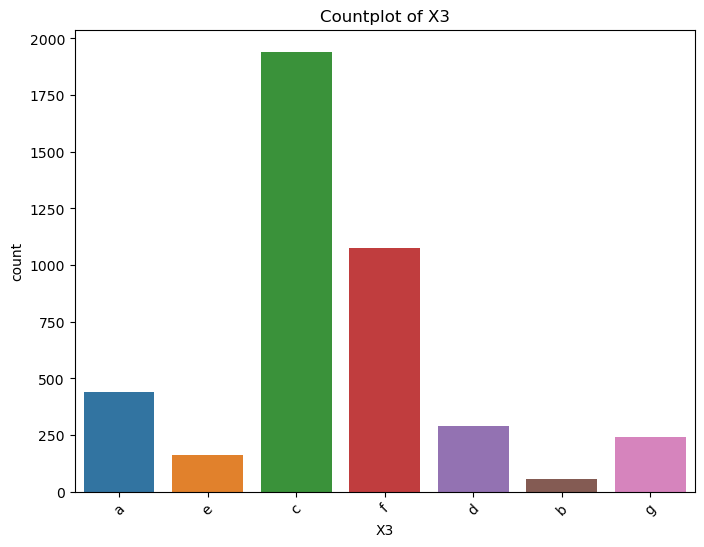

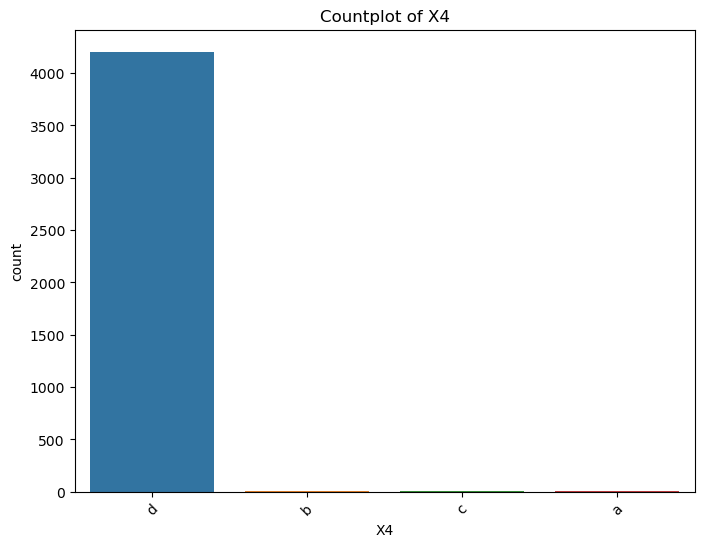

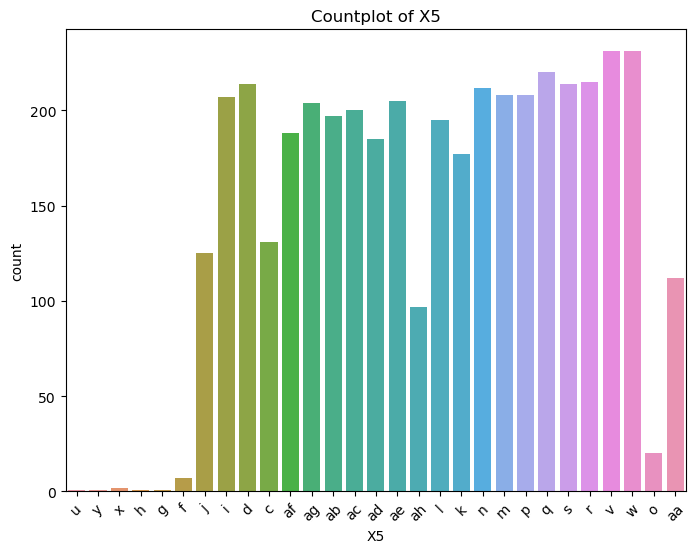

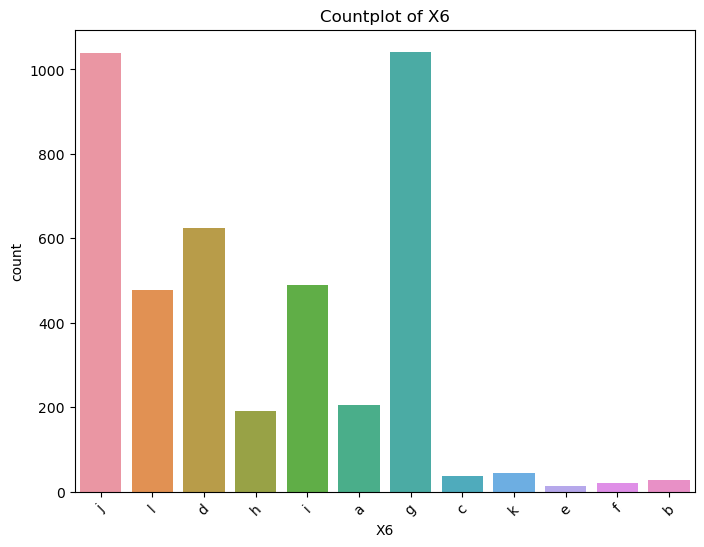

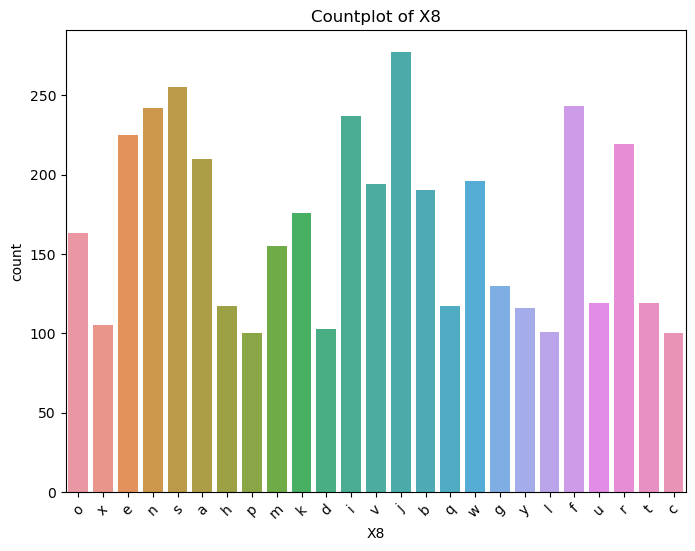

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_cols = [col for col in Benz.columns if Benz[col].dtype == 'object']

# Visualize categorical columns using countplot
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=Benz)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
    plt.show()

In [20]:
# Identify categorical columns
categorical_cols = [col for col in Benz.columns if Benz[col].dtype == 'object']

# Apply one-hot encoding only to identified categorical columns
Benz_encoded = pd.get_dummies(Benz, columns=categorical_cols, drop_first=True)
print(Benz_encoded)

             y  X10  X11  X12  X13  X14  X15  X16  X17  X18  ...  X8_p  X8_q  \
0     1.740517  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...     0     0   
1    -0.583837  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...     0     0   
2    -1.258384  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...     0     0   
3    -1.018692  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0     0   
4    -1.161627  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0     0   
...        ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
4204  0.452996  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...     0     1   
4205  0.528862  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0     0   
4206  0.553601  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  ...     0     0   
4207 -0.641561  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...     0     0   
4208  0.643211  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0     0   

      X8_r  X8_s  X8_t  X8_u  X8_v  X8_

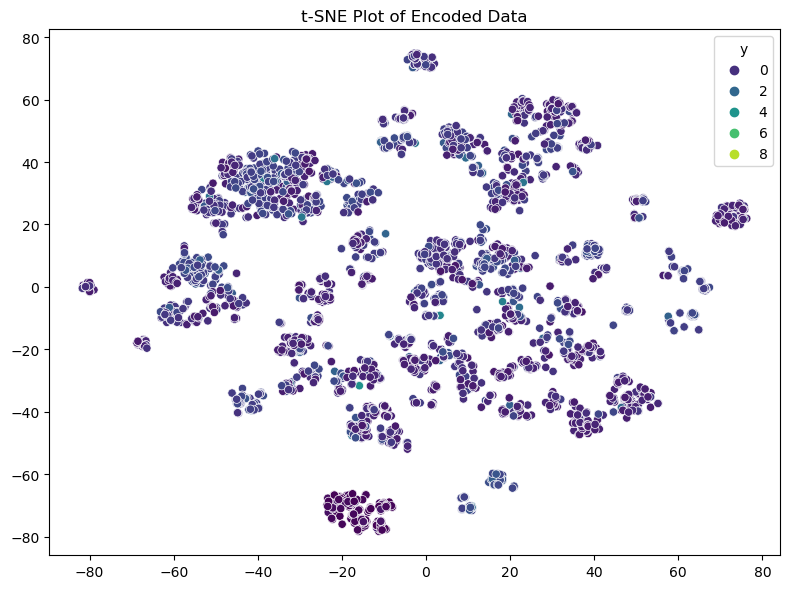

In [21]:
from sklearn.manifold import TSNE

target_column = 'y' 

# Apply t-SNE to visualize high-dimensional data in 2D
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(Benz_encoded.drop(columns=[target_column]))

# Create a scatter plot using t-SNE components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=Benz_encoded[target_column], palette='viridis')
plt.title('t-SNE Plot of Encoded Data')
plt.legend(title=target_column)
plt.tight_layout()
plt.show()

In [22]:
X = Benz_encoded.drop(columns=['y'])
Y = Benz_encoded['y']

# Splitting the Data into Training and Testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1234)

In [23]:
X_train.head()

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
322,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3318,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
3972,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0


In [24]:
X_test.head()

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
2638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
1236,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


## Base Model

In [25]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate the Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=4321)

# Train the model
rf_regressor.fit(X_train, Y_train)

# Predict on the test set
rf_predictions = rf_regressor.predict(X_test)

# Evaluation metrics
print("Random Forest Regressor Metrics:")
print("R-squared:", r2_score(Y_test, rf_predictions))
print("Mean Absolute Error (MAE):", mean_absolute_error(Y_test, rf_predictions))
print("Mean Squared Error (MSE):", mean_squared_error(Y_test, rf_predictions))

Random Forest Regressor Metrics:
R-squared: 0.45589234116481636
Mean Absolute Error (MAE): 0.317277453160533
Mean Squared Error (MSE): 0.2921766966016914


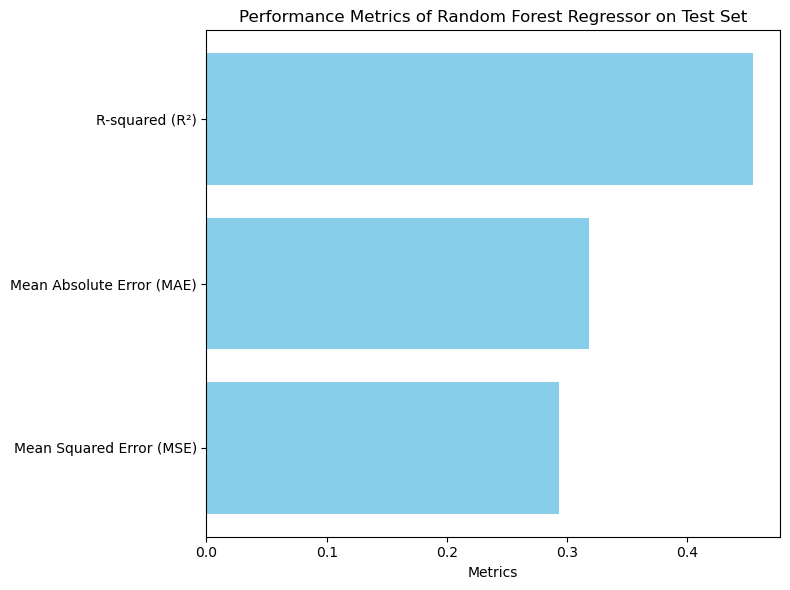

In [26]:
import matplotlib.pyplot as plt

# Metrics values
mse = 0.2930805488157503  # Replace with your Mean Squared Error value
mae = 0.3178644799773623   # Replace with your Mean Absolute Error value
r_squared = 0.45420913741227675  # Replace with your R-squared value

# Creating lists of metric names and values
metric_names = ['Mean Squared Error (MSE)', 'Mean Absolute Error (MAE)', 'R-squared (R²)']
metric_values = [mse, mae, r_squared]

# Plotting the performance metrics
plt.figure(figsize=(8, 6))
plt.barh(metric_names, metric_values, color='skyblue')
plt.xlabel('Metrics')
plt.title('Performance Metrics of Random Forest Regressor on Test Set')
plt.tight_layout()
plt.show()

## Feature Engineering 

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV

# Create LassoCV model for alpha tuning
lasso_cv = LassoCV(alphas=[0.01, 0.1, 1.0, 10.0], cv=5, random_state=42)  # Provide a list of alpha values to try
lasso_cv.fit(X_train, Y_train)

# Get the best alpha determined by cross-validation
best_alpha = lasso_cv.alpha_

# Train the Lasso Regression model with the best alpha
lasso = Lasso(alpha=best_alpha, random_state=42)
lasso.fit(X_train, Y_train)

# Get feature weights (coefficients)
feature_weights = lasso.coef_
print("Feature Weights (Coefficients):")
for feature, weight in zip(X.columns, feature_weights):
    print(f"{feature}: {weight}")

# Identify selected features (non-zero coefficients)
selected_features = X.columns[lasso.coef_ != 0]
print("\nSelected Features:")
print(selected_features)

Feature Weights (Coefficients):
X10: 0.0
X11: 0.0
X12: 0.0
X13: -0.0
X14: -0.0
X15: 0.0
X16: 0.0
X17: -0.0
X18: -0.0
X19: -0.0
X20: -0.0
X21: 0.0
X22: -0.0
X23: 0.0
X24: -0.0
X26: -0.0
X27: -0.003017106943511622
X28: -0.0
X29: -0.6371218755549583
X30: -0.0
X31: 0.0
X32: -0.0
X33: -0.0
X34: 0.0
X35: 0.0
X36: -0.0
X37: 0.0
X38: -0.0
X39: -0.0
X40: 0.0
X41: 0.0
X42: -0.0
X43: -0.0
X44: 0.0
X45: 0.0
X46: 0.0
X47: 0.0
X48: 0.0
X49: 0.0
X50: 0.0
X51: 0.0
X52: 0.0
X53: -0.0
X54: -0.0
X55: 0.0
X56: 0.0
X57: 0.0
X58: 0.006323104837062541
X59: -0.0
X60: -0.0
X61: -0.0
X62: 0.0
X63: -0.0
X64: -0.0
X65: 0.0
X66: 0.0
X67: -0.0
X68: 0.0
X69: 0.0
X70: -0.0
X71: 0.0
X73: 0.0
X74: -0.0
X75: 0.0
X76: -0.0
X77: 0.0
X78: 0.0
X79: -0.0
X80: -0.0
X81: -0.0
X82: 0.0
X83: 0.0
X84: 0.0
X85: 0.0
X86: 0.0
X87: -0.0
X88: -0.0
X89: -0.0
X90: -0.0
X91: -0.0
X92: -0.0
X93: 0.0
X94: -0.0
X95: 0.0
X96: 0.0
X97: -0.0
X98: -0.0
X99: -0.0
X100: -0.0
X101: -0.0
X102: -0.0
X103: -0.0
X104: 0.0
X105: 0.0
X106: -0.0
X107: 0.

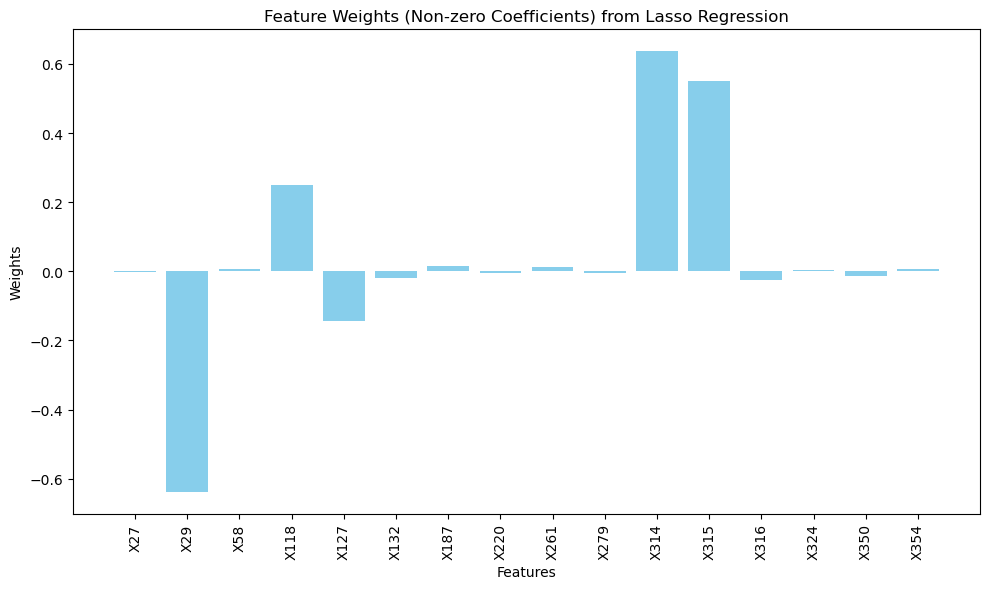

In [28]:
import matplotlib.pyplot as plt

# Create a DataFrame for easier plotting
feature_weights_df = pd.DataFrame({'Feature': X.columns, 'Weight': feature_weights})

# Filter for selected features with non-zero coefficients
selected_features_df = feature_weights_df[feature_weights_df['Weight'] != 0]

# Plotting feature weights for selected features
plt.figure(figsize=(10, 6))
plt.bar(selected_features_df['Feature'], selected_features_df['Weight'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Weights')
plt.title('Feature Weights (Non-zero Coefficients) from Lasso Regression')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()

In [29]:
best_alpha = lasso_cv.alpha_
print(f"Optimal Alpha Value: {best_alpha}")

Optimal Alpha Value: 0.01


In [30]:
from sklearn.model_selection import train_test_split

# Assuming 'X' contains only the selected features obtained from Lasso Regression
X_selected = Benz_encoded[selected_features]  # Use only the selected features

# Assuming 'y' represents the target variable
y = Benz_encoded['y']

# Splitting the data into training and testing sets (adjust test_size and random_state as needed)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.25, random_state=42)

# Printing the shapes of the resulting sets
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (3156, 16), y_train shape: (3156,)
X_test shape: (1053, 16), y_test shape: (1053,)


## After Feature Engineering

In [31]:
# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust parameters like n_estimators, etc.

# Fit the Random Forest Regressor on the training data
rf_regressor.fit(X_train, y_train)

# Predict using the trained Random Forest model
y_pred = rf_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE) on Test Set: {mse}")

# Calculate Mean Absolute Error (MAE) on the test set
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE) on Test Set: {mae}")

# Calculate R-squared (R²) score on the test set
r_squared = r2_score(y_test, y_pred)
print(f"R-squared (R²) Score on Test Set: {r_squared}")

Mean Squared Error (MSE) on Test Set: 0.21953106928651744
Mean Absolute Error (MAE) on Test Set: 0.31304523287508423
R-squared (R²) Score on Test Set: 0.5429743521050718


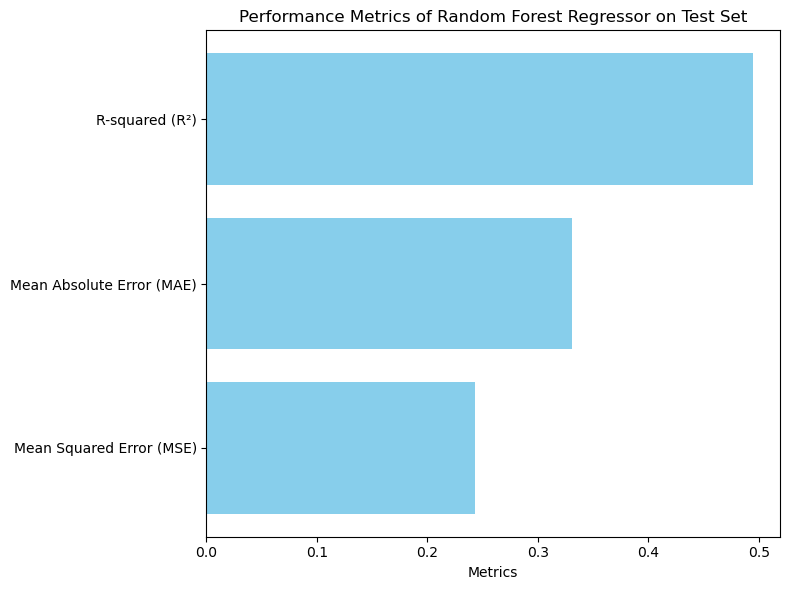

In [32]:
import matplotlib.pyplot as plt

# Metrics values
mse = 0.24286194248790505  # Replace with your Mean Squared Error value
mae = 0.33051646464693907   # Replace with your Mean Absolute Error value
r_squared = 0.4944035166626307  # Replace with your R-squared value

# Creating lists of metric names and values
metric_names = ['Mean Squared Error (MSE)', 'Mean Absolute Error (MAE)', 'R-squared (R²)']
metric_values = [mse, mae, r_squared]

# Plotting the performance metrics
plt.figure(figsize=(8, 6))
plt.barh(metric_names, metric_values, color='skyblue')
plt.xlabel('Metrics')
plt.title('Performance Metrics of Random Forest Regressor on Test Set')
plt.tight_layout()
plt.show()

## Grid Search and Cross Validation for Best Results

## 1. Random Forest

In [34]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search through
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],  # Adjust values as needed
    'max_depth': [None, 5, 10, 15, 20, 25, 30, 50], 
}

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Use the best model to predict on the test set
y_pred_grid = best_rf_model.predict(X_test)

# Calculate metrics for the best model
mse_grid = mean_squared_error(y_test, y_pred_grid)
mae_grid = mean_absolute_error(y_test, y_pred_grid)
r_squared_grid = r2_score(y_test, y_pred_grid)

# Print the metrics
print("Best Parameters:", best_params)
print(f"Best Model Mean Squared Error (MSE) on Test Set: {mse_grid}")
print(f"Best Model Mean Absolute Error (MAE) on Test Set: {mae_grid}")
print(f"Best Model R-squared (R²) Score on Test Set: {r_squared_grid}")

Best Parameters: {'max_depth': 5, 'n_estimators': 200}
Best Model Mean Squared Error (MSE) on Test Set: 0.206897107579801
Best Model Mean Absolute Error (MAE) on Test Set: 0.3003232365345778
Best Model R-squared (R²) Score on Test Set: 0.5692760712797545


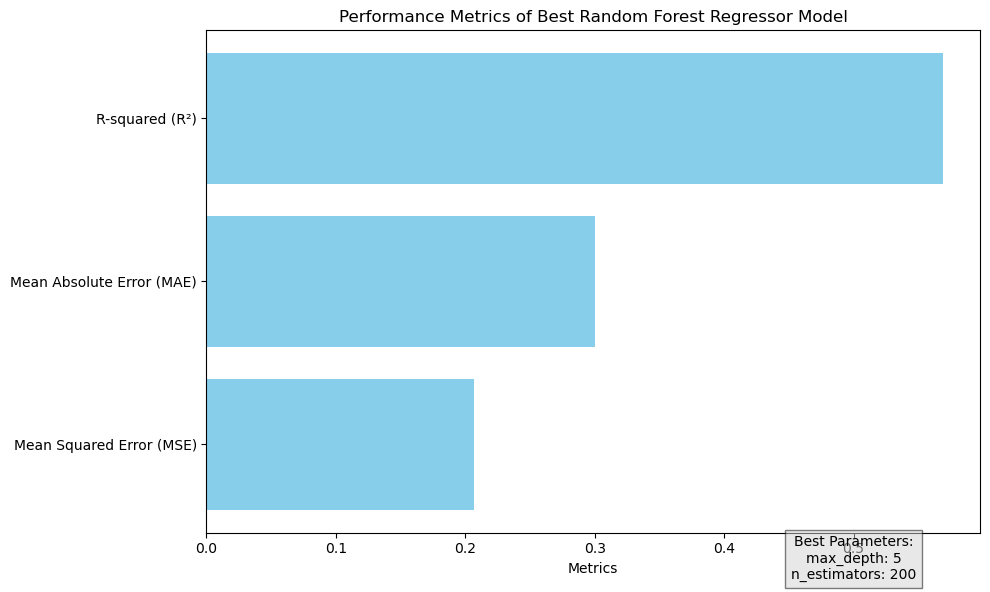

In [35]:
import matplotlib.pyplot as plt

# Metrics values from the best model
metrics_values = [mse_grid, mae_grid, r_squared_grid]
metric_names = ['Mean Squared Error (MSE)', 'Mean Absolute Error (MAE)', 'R-squared (R²)']

# Plotting the performance metrics including best parameters
plt.figure(figsize=(10, 6))
plt.barh(metric_names, metrics_values, color='skyblue')
plt.xlabel('Metrics')
plt.title('Performance Metrics of Best Random Forest Regressor Model')

# Annotating the best parameters
best_params_str = '\n'.join([f"{key}: {val}" for key, val in best_params.items()])
plt.text(0.5, -0.7, f"Best Parameters:\n{best_params_str}", ha='center', va='center', fontsize=10, bbox=dict(facecolor='lightgrey', alpha=0.5))

plt.tight_layout()
plt.show()

In [36]:
# Select the relevant columns for training from Benz_encoded
X_train = Benz_encoded[selected_features]
y_train = Benz_encoded['y']

# Confirm the consistency of feature names in X_train and X_test
print("Feature names in X_train:", X_train.columns.tolist())
print("Feature names in X_test:", X_test.columns.tolist())

Feature names in X_train: ['X27', 'X29', 'X58', 'X118', 'X127', 'X132', 'X187', 'X220', 'X261', 'X279', 'X314', 'X315', 'X316', 'X324', 'X350', 'X354']
Feature names in X_test: ['X27', 'X29', 'X58', 'X118', 'X127', 'X132', 'X187', 'X220', 'X261', 'X279', 'X314', 'X315', 'X316', 'X324', 'X350', 'X354']


## 2. XGBoost

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
# Initialize XGBoost Regressor
xgb_regressor = XGBRegressor(random_state=42)

# Define hyperparameters for grid search
param_grid = {
    'n_estimators': [100, 300, 500, 600, 750, 1000],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7]
}

# Create GridSearchCV object
xgb_grid = GridSearchCV(xgb_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
xgb_grid.fit(X_train, y_train)

# Get best parameters and best estimator
best_params_xgb = xgb_grid.best_params_
best_estimator_xgb = xgb_grid.best_estimator_

# Predict using the best estimator on the test set
y_pred_xgb = xgb_grid.predict(X_test)

# Calculate metrics
mse_grid = mean_squared_error(y_test, y_pred_xgb)
mae_grid = mean_absolute_error(y_test, y_pred_xgb)
r_squared_grid = r2_score(y_test, y_pred_xgb)

# Print metrics and best parameters
print("XGBoost Regression")
print("Best Parameters:", best_params_xgb)
print(f"Best Model Mean Squared Error (MSE) on Test Set: {mse_grid}")
print(f"Best Model Mean Absolute Error (MAE) on Test Set: {mae_grid}")
print(f"Best Model R-squared (R²) Score on Test Set: {r_squared_grid}")

XGBoost Regression
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
Best Model Mean Squared Error (MSE) on Test Set: 0.1960185591918856
Best Model Mean Absolute Error (MAE) on Test Set: 0.2970800497059959
Best Model R-squared (R²) Score on Test Set: 0.5919233240868482


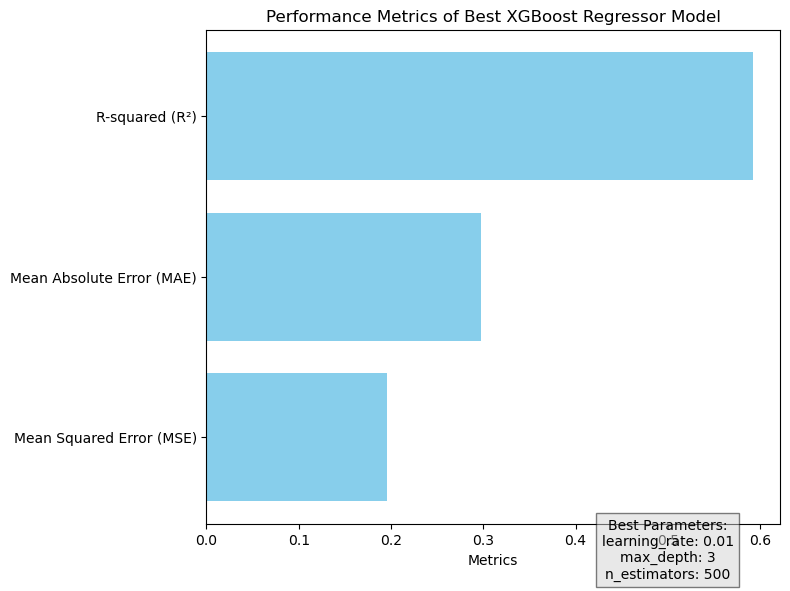

In [38]:
import matplotlib.pyplot as plt

# Metrics values from the best XGBoost model
metrics_values = [mse_grid, mae_grid, r_squared_grid]
metric_names = ['Mean Squared Error (MSE)', 'Mean Absolute Error (MAE)', 'R-squared (R²)']

# Plotting the performance metrics including best parameters
plt.figure(figsize=(8, 6))
plt.barh(metric_names, metrics_values, color='skyblue')
plt.xlabel('Metrics')
plt.title('Performance Metrics of Best XGBoost Regressor Model')

# Annotating the best parameters
best_params_str = '\n'.join([f"{key}: {val}" for key, val in best_params_xgb.items()])
plt.text(0.5, -0.7, f"Best Parameters:\n{best_params_str}", ha='center', va='center', fontsize=10, bbox=dict(facecolor='lightgrey', alpha=0.5))

plt.tight_layout()
plt.show()

## Ridge Regression

In [39]:
ridge_model = Ridge(random_state=42)

# Define hyperparameters for grid search
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]  # Define appropriate alpha values
}

# Create GridSearchCV object
ridge_grid = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the training data
ridge_grid.fit(X_train, y_train)

# Get best parameters and best estimator
best_params_ridge = ridge_grid.best_params_
best_estimator_ridge = ridge_grid.best_estimator_

# Predict using the best estimator
y_pred_ridge = best_estimator_ridge.predict(X_test)

# Calculate metrics
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r_squared_ridge = r2_score(y_test, y_pred_ridge)

# Print metrics and best parameters
print("Ridge Regression with Grid Search and Cross-Validation")
print("Best Parameters:", best_params_ridge)
print(f"Mean Squared Error (MSE) on Test Set: {mse_ridge}")
print(f"Mean Absolute Error (MAE) on Test Set: {mae_ridge}")
print(f"R-squared (R²) Score on Test Set: {r_squared_ridge}")

Ridge Regression with Grid Search and Cross-Validation
Best Parameters: {'alpha': 10.0}
Mean Squared Error (MSE) on Test Set: 0.20982735788517
Mean Absolute Error (MAE) on Test Set: 0.307889250554774
R-squared (R²) Score on Test Set: 0.5631757978712661


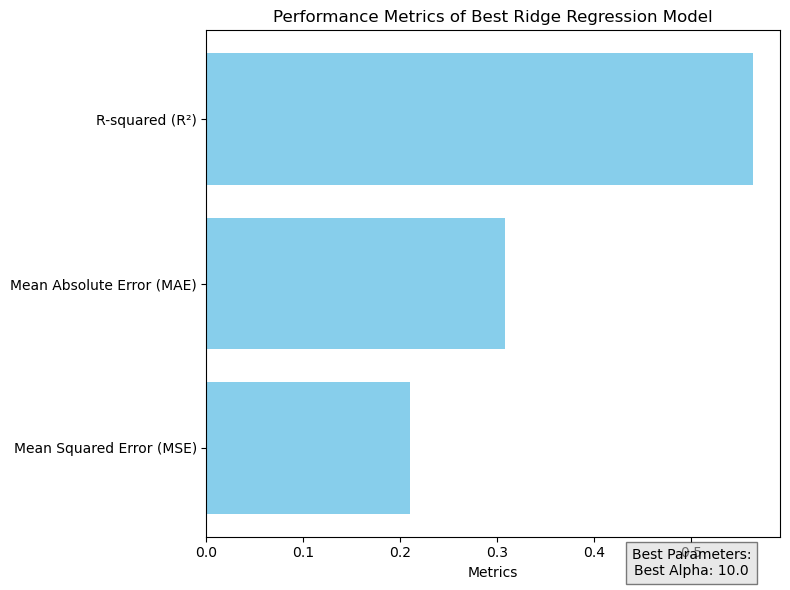

In [42]:
import matplotlib.pyplot as plt

# Metrics values from the best Ridge Regression model
metrics_values = [mse_ridge, mae_ridge, r_squared_ridge]
metric_names = ['Mean Squared Error (MSE)', 'Mean Absolute Error (MAE)', 'R-squared (R²)']

# Plotting the performance metrics including best parameters
plt.figure(figsize=(8, 6))
plt.barh(metric_names, metrics_values, color='skyblue')
plt.xlabel('Metrics')
plt.title('Performance Metrics of Best Ridge Regression Model')

# Annotating the best parameters
best_params_str = f"Best Alpha: {best_params_ridge['alpha']}"
plt.text(0.5, -0.7, f"Best Parameters:\n{best_params_str}", ha='center', va='center', fontsize=10, bbox=dict(facecolor='lightgrey', alpha=0.5))

plt.tight_layout()
plt.show()

## Support Vector Machine

In [43]:
#Initialize the Model
svm_model = SVR(kernel='rbf')

# Define hyperparameters for grid search
param_grid = {
    'C': [0.1, 1.0, 10.0],  # Regularization parameter
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf' kernel
}

# Create GridSearchCV object
svm_grid = GridSearchCV(svm_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the training data
svm_grid.fit(X_train, y_train)

# Get best parameters and best estimator
best_params_svm = svm_grid.best_params_
best_estimator_svm = svm_grid.best_estimator_

# Predict using the best estimator
y_pred_svm = best_estimator_svm.predict(X_test)

# Calculate metrics
mse_svm = mean_squared_error(y_test, y_pred_svm)
mae_svm = mean_absolute_error(y_test, y_pred_svm)
r_squared_svm = r2_score(y_test, y_pred_svm)

# Print metrics and best parameters
print("Support Vector Machine (SVM) with Grid Search and Cross-Validation")
print("Best Parameters:", best_params_svm)
print(f"Mean Squared Error (MSE) on Test Set: {mse_svm}")
print(f"Mean Absolute Error (MAE) on Test Set: {mae_svm}")
print(f"R-squared (R²) Score on Test Set: {r_squared_svm}")

Support Vector Machine (SVM) with Grid Search and Cross-Validation
Best Parameters: {'C': 1.0, 'gamma': 'auto'}
Mean Squared Error (MSE) on Test Set: 0.2122547591721809
Mean Absolute Error (MAE) on Test Set: 0.2767561121757841
R-squared (R²) Score on Test Set: 0.558122368989866


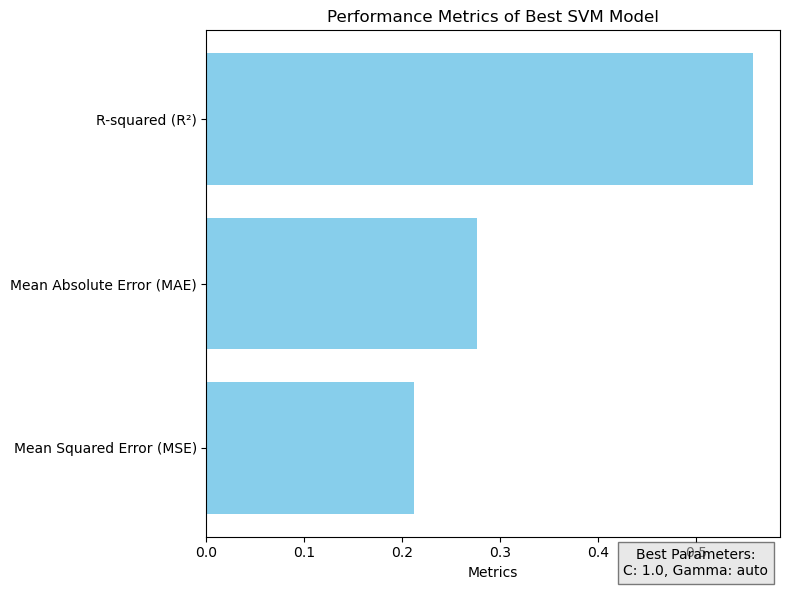

In [44]:
import matplotlib.pyplot as plt

# Metrics values from the best SVM model
metrics_values = [mse_svm, mae_svm, r_squared_svm]
metric_names = ['Mean Squared Error (MSE)', 'Mean Absolute Error (MAE)', 'R-squared (R²)']

# Plotting the performance metrics including best parameters
plt.figure(figsize=(8, 6))
plt.barh(metric_names, metrics_values, color='skyblue')
plt.xlabel('Metrics')
plt.title('Performance Metrics of Best SVM Model')

# Annotating the best parameters
best_params_str = f"C: {best_params_svm['C']}, Gamma: {best_params_svm['gamma']}"
plt.text(0.5, -0.7, f"Best Parameters:\n{best_params_str}", ha='center', va='center', fontsize=10, bbox=dict(facecolor='lightgrey', alpha=0.5))

plt.tight_layout()
plt.show()

## Gradient Boosting

In [45]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize Gradient Boosting model
gbm_model = GradientBoostingRegressor(random_state=42)

# Define hyperparameters for grid search
param_grid = {
    'n_estimators': [100, 300, 500],  # Number of boosting stages
    'learning_rate': [0.1, 0.01, 0.001],  # Learning rate
    'max_depth': [3, 5, 7]  # Maximum depth of the individual trees
}

# Create GridSearchCV object
gbm_grid = GridSearchCV(gbm_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the training data
gbm_grid.fit(X_train, y_train)

# Get best parameters and best estimator
best_params_gbm = gbm_grid.best_params_
best_estimator_gbm = gbm_grid.best_estimator_

# Predict using the best estimator
y_pred_gbm = best_estimator_gbm.predict(X_test)

# Calculate metrics
mse_gbm = mean_squared_error(y_test, y_pred_gbm)
mae_gbm = mean_absolute_error(y_test, y_pred_gbm)
r_squared_gbm = r2_score(y_test, y_pred_gbm)

# Print metrics and best parameters
print("Gradient Boosting Machine (GBM) with Grid Search and Cross-Validation")
print("Best Parameters:", best_params_gbm)
print(f"Mean Squared Error (MSE) on Test Set: {mse_gbm}")
print(f"Mean Absolute Error (MAE) on Test Set: {mae_gbm}")
print(f"R-squared (R²) Score on Test Set: {r_squared_gbm}")

Gradient Boosting Machine (GBM) with Grid Search and Cross-Validation
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Mean Squared Error (MSE) on Test Set: 0.19807273613232576
Mean Absolute Error (MAE) on Test Set: 0.2972268486470646
R-squared (R²) Score on Test Set: 0.5876468836260668


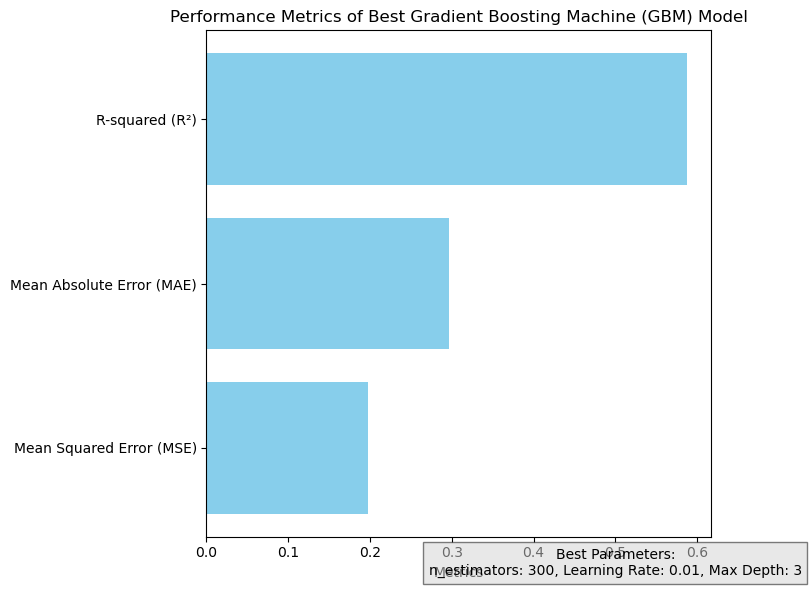

In [46]:
import matplotlib.pyplot as plt

# Metrics values from the best GBM model
metrics_values = [mse_gbm, mae_gbm, r_squared_gbm]
metric_names = ['Mean Squared Error (MSE)', 'Mean Absolute Error (MAE)', 'R-squared (R²)']

# Plotting the performance metrics including best parameters
plt.figure(figsize=(8, 6))
plt.barh(metric_names, metrics_values, color='skyblue')
plt.xlabel('Metrics')
plt.title('Performance Metrics of Best Gradient Boosting Machine (GBM) Model')

# Annotating the best parameters
best_params_str = f"n_estimators: {best_params_gbm['n_estimators']}, Learning Rate: {best_params_gbm['learning_rate']}, Max Depth: {best_params_gbm['max_depth']}"
plt.text(0.5, -0.7, f"Best Parameters:\n{best_params_str}", ha='center', va='center', fontsize=10, bbox=dict(facecolor='lightgrey', alpha=0.5))

plt.tight_layout()
plt.show()

## Ensembling The Meta Learner

In [48]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred_grid_test = y_pred_grid  
y_pred_xgb_test = y_pred_xgb  
y_pred_ridge_test = y_pred_ridge
y_pred_svm_test = y_pred_svm 
y_pred_gbm_test = y_pred_gbm 

# Combine predictions from base models
X_meta_test = np.column_stack((y_pred_grid_test, y_pred_xgb_test, y_pred_ridge_test, y_pred_svm_test, y_pred_gbm_test))

# Initialize Random Forest Regressor as Meta-Learner
meta_rf = RandomForestRegressor(random_state=42)

# Assuming y_test is your actual test set target variable
# Fit the meta-learner on the base models' predictions and actual test set target variable
meta_rf.fit(X_meta_test, y_test)

# Predict using the meta-learner
meta_rf_predictions = meta_rf.predict(X_meta_test)

# Calculate evaluation metrics for the meta-learner
meta_rf_mse = mean_squared_error(y_test, meta_rf_predictions)
meta_rf_mae = mean_absolute_error(y_test, meta_rf_predictions)
meta_rf_r_squared = r2_score(y_test, meta_rf_predictions)

# Print metrics for the meta-learner
print("Meta-Learner (Random Forest) Evaluation Metrics")
print(f"Mean Squared Error (MSE) on Test Set: {meta_rf_mse}")
print(f"Mean Absolute Error (MAE) on Test Set: {meta_rf_mae}")
print(f"R-squared (R²) Score on Test Set: {meta_rf_r_squared}")

Meta-Learner (Random Forest) Evaluation Metrics
Mean Squared Error (MSE) on Test Set: 0.14254552472274315
Mean Absolute Error (MAE) on Test Set: 0.24893295040811836
R-squared (R²) Score on Test Set: 0.7032449165274703


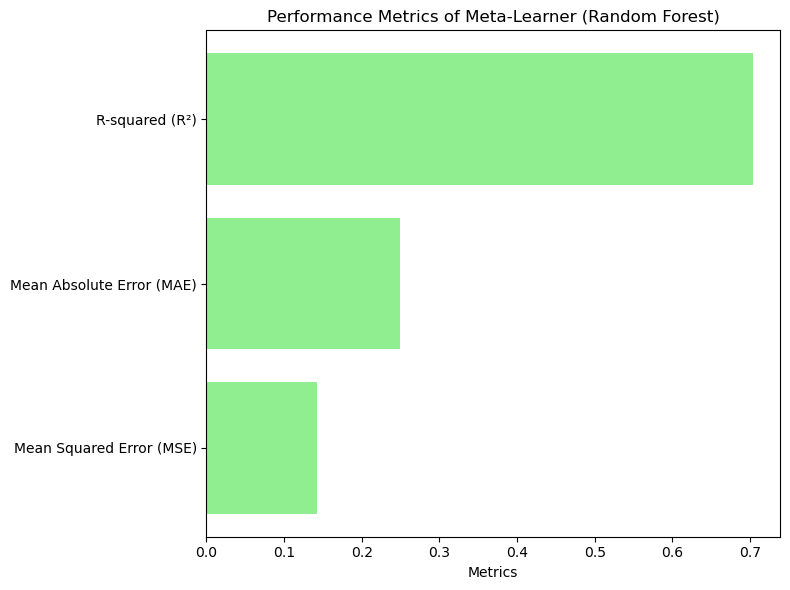

In [49]:
import matplotlib.pyplot as plt

# Metrics values for the meta-learner (Random Forest)
metrics_values_meta = [meta_rf_mse, meta_rf_mae, meta_rf_r_squared]
metric_names_meta = ['Mean Squared Error (MSE)', 'Mean Absolute Error (MAE)', 'R-squared (R²)']

# Plotting the performance metrics for the meta-learner
plt.figure(figsize=(8, 6))
plt.barh(metric_names_meta, metrics_values_meta, color='lightgreen')
plt.xlabel('Metrics')
plt.title('Performance Metrics of Meta-Learner (Random Forest)')

plt.tight_layout()
plt.show()